## Problem Statement

The price of an airline tickets is predicted based on the past data for several airlines. 
Effect of combination of various features like - Date of Journey, Route, Start city,Destination City,Airline etc are modelled
Various models and encoding techniques for catagorical data have been tried.

Result RandomForestRegressor has privided the best RMSE values for this problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier,RandomForestRegressor
#from xgboost import XGBClassifier                                           
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split   
pd.set_option('display.max_columns',None)

from sklearn.linear_model import LinearRegression        
from sklearn import metrics                               


#ADDED all the required Libraries.


## Data Loading and Cleaning
#doublecheck the current directory
#change directory to 'data'

In [2]:
import os
print(os.getcwd())
os.chdir('./data')
print(os.getcwd())

C:\Users\BLR_01\Pictures\Geyitm\Hack2
C:\Users\BLR_01\Pictures\Geyitm\Hack2\data


# Read the data.

In [3]:
# Load the dataframe: both initial train and test 
df_train_initial = pd.read_csv('train.csv',delimiter=',')
df_test_initial =pd.read_csv('test.csv',delimiter=',')

#find the shapes of initial data
print('Shape of train_initial: ',df_train_initial.shape)
print('Shape of test_initial: ',df_test_initial.shape)


('Shape of train_initial: ', (8012, 11))
('Shape of test_initial: ', (2671, 10))


# Observe the data

In [4]:
# info on train data initial
df_train_initial.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [5]:
# info on test data
df_test_initial.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [6]:

# More views of training data in different ways 
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
Airline            8012 non-null object
Date_of_Journey    8012 non-null object
Source             8012 non-null object
Destination        8012 non-null object
Route              8011 non-null object
Dep_Time           8012 non-null object
Arrival_Time       8012 non-null object
Duration           8012 non-null object
Total_Stops        8011 non-null object
Additional_Info    8012 non-null object
Price              8012 non-null int64
dtypes: int64(1), object(10)
memory usage: 688.6+ KB


In [7]:
df_train_initial.describe()

,Price
count,8012.000000
mean,9062.037943
std,4626.593069
min,1759.000000
25%,5277.000000
50%,8371.000000
75%,12373.000000
max,79512.000000


# Finding null values for training data

In [8]:
df_train_initial.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#Observations
#one row has the Route as well as Total_steps null, that will be dropped


In [9]:
df_train_initial.dropna(subset = ['Total_Stops'], inplace=True)

In [10]:
df_train_initial.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df_train_initial.shape

(8011, 11)

In [12]:
# We see that one row is reduced

# Lets check some Distinct Values

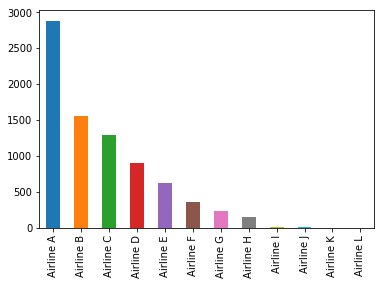

In [13]:
df_train_initial['Airline'].value_counts().plot(kind = 'bar')


In [14]:
df_train_initial['Source'].value_counts()

Delhi       3397
Kolkata     2152
Banglore    1650
Mumbai       523
Chennai      289
Name: Source, dtype: int64

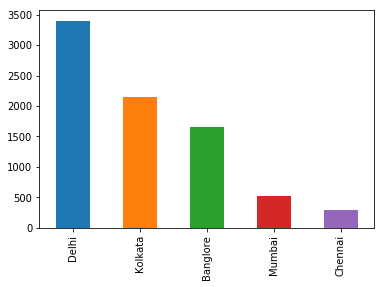

In [15]:
df_train_initial['Source'].value_counts().plot(kind = 'bar')

In [16]:
df_train_initial['Destination'].value_counts()

Cochin       3397
Banglore     2152
Delhi         956
New Delhi     694
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

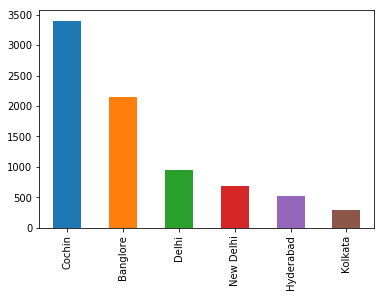

In [17]:
df_train_initial['Destination'].value_counts().plot(kind = 'bar')

# The above values suggest need to combine the values for Delhi and 'New Delhi'

In [18]:
df_train_initial['Destination'] = df_train_initial['Destination'].replace(['New Delhi'],'Delhi')
df_train_initial['Destination'].value_counts()

Cochin       3397
Banglore     2152
Delhi        1650
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

# Lets continue with other value counts

In [19]:
df_train_initial['Route'].value_counts()

DEL → BOM → COK                1784
BLR → DEL                      1172
CCU → BOM → BLR                 752
CCU → BLR                       537
BOM → HYD                       468
CCU → DEL → BLR                 418
BLR → BOM → DEL                 300
MAA → CCU                       289
DEL → HYD → COK                 250
DEL → JAI → BOM → COK           176
DEL → BLR → COK                 170
DEL → COK                       164
DEL → AMD → BOM → COK           149
DEL → MAA → COK                 105
DEL → IDR → BOM → COK            69
DEL → HYD → MAA → COK            60
DEL → NAG → BOM → COK            57
CCU → MAA → BLR                  45
DEL → GOI → BOM → COK            44
DEL → HYD → BOM → COK            43
CCU → HYD → BLR                  40
DEL → PNQ → COK                  38
CCU → BBI → BLR                  36
DEL → BHO → BOM → COK            36
CCU → GAU → BLR                  33
CCU → IXR → DEL → BLR            31
DEL → LKO → BOM → COK            30
DEL → ATQ → BOM → COK       

In [20]:
df_train_initial['Total_Stops'].value_counts()

1 stop      4235
non-stop    2630
2 stops     1112
3 stops       34
Name: Total_Stops, dtype: int64

# Additional Feature Creation
#From Total_Stops we know non-stop would mean 0. So we will replace 'non' with 0, take out only the first char and convert the data type to int and create this as a new variable


In [21]:
df_train_initial['stops'] = df_train_initial['Total_Stops'].replace('non-stop','0 stops').str.split(' ').str[0].astype(int)

In [22]:
df_train_initial.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,stops
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480,1
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016,0
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879,1
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,1
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663,1


Text(0,0.5,'Price')

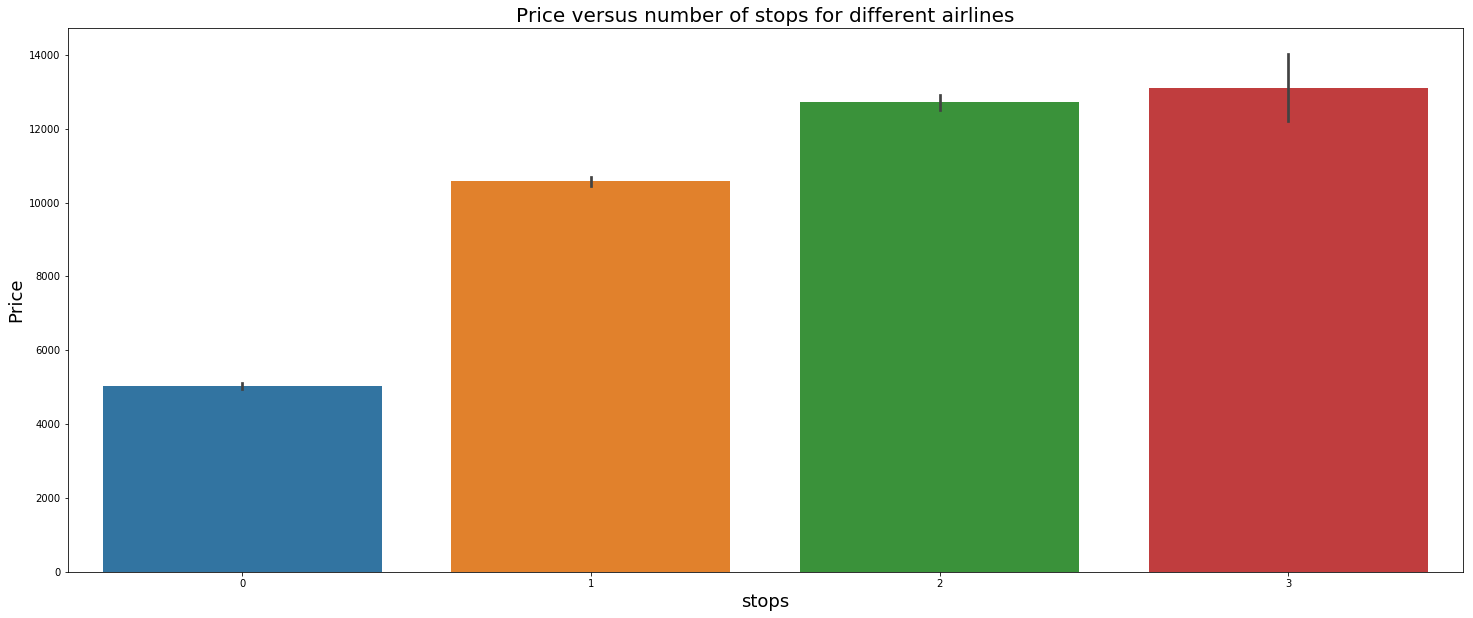

In [23]:
plt.figure(figsize=(25,10))
plt.title('Price versus number of stops for different airlines',fontsize=20)
df_stops = df_train_initial.groupby(["stops"])['Price'].aggregate(np.median).reset_index().sort_values('Price')
sns.barplot(x='stops', y="Price", data=df_train_initial, order=df_stops['stops'])
plt.xlabel('stops', fontsize=18)
plt.ylabel('Price', fontsize=18)

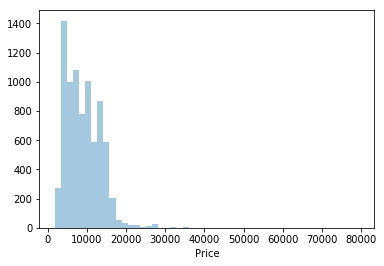

In [24]:
#letS DO SOME ANALYSIS
sns.distplot(df_train_initial["Price"],kde=False)


# Create new time based features deried from Date_of_Journey - we arrive at the day-of-the-week which is most important variable as airline prices tend to vary based on day
# Similarly the month for seasonality
# similarly we will derive departure time in hours ignoring the minutes
# Arrival time could also have some effect but is ignored as it could be again correlated with departure time (though one experiment can later be made considering it (or only it)

In [25]:
#create day_of_week
df_train_initial['day_of_week']=pd.DatetimeIndex(df_train_initial['Date_of_Journey']).dayofweek.astype(object)
#note make it as object as we can encode it; we do not want enums
#create month
df_train_initial['month']=pd.DatetimeIndex(df_train_initial['Date_of_Journey']).month.astype(object)

Text(0,0.5,'Price')

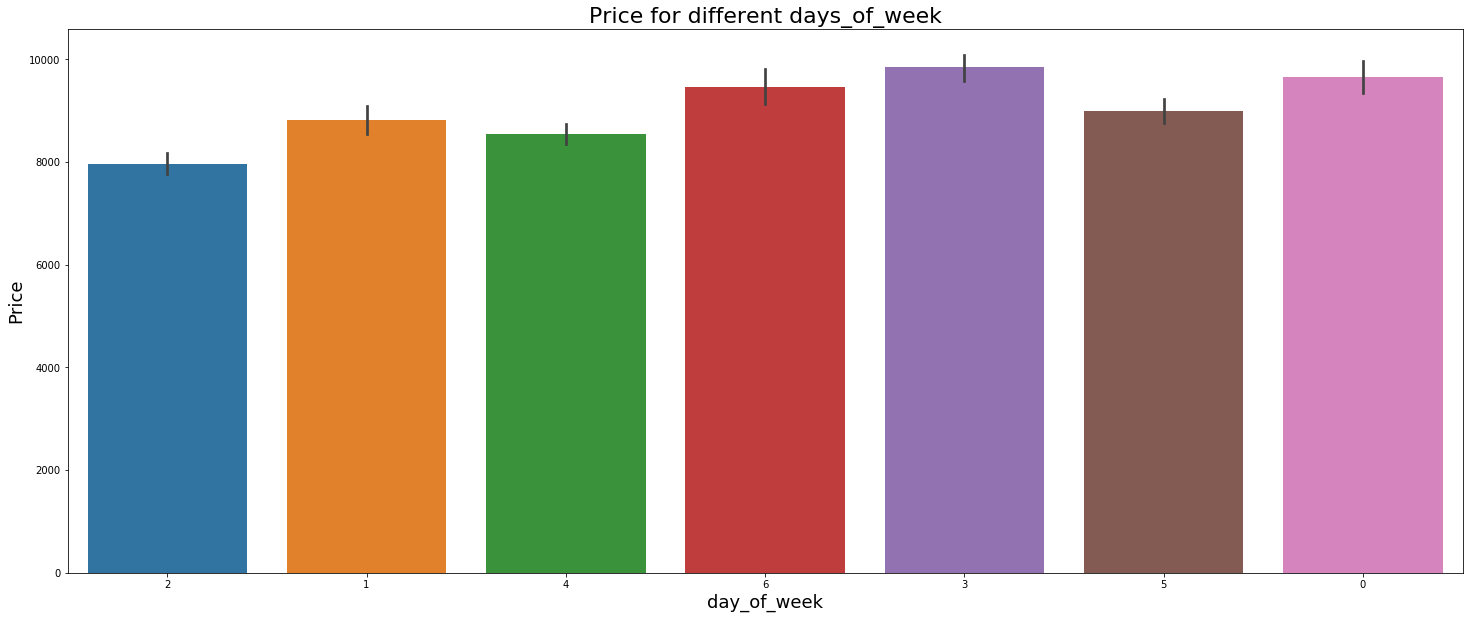

In [26]:
# Visualize
plt.figure(figsize=(25,10))
plt.title('Price for different days_of_week',fontsize=22)
df_stops = df_train_initial.groupby(["day_of_week"])['Price'].aggregate(np.median).reset_index().sort_values('Price')
sns.barplot(x='day_of_week', y="Price", data=df_train_initial, order=df_stops['day_of_week'],label='big')
plt.xlabel('day_of_week', fontsize=18)
plt.ylabel('Price', fontsize=18)

Text(0,0.5,'Price')

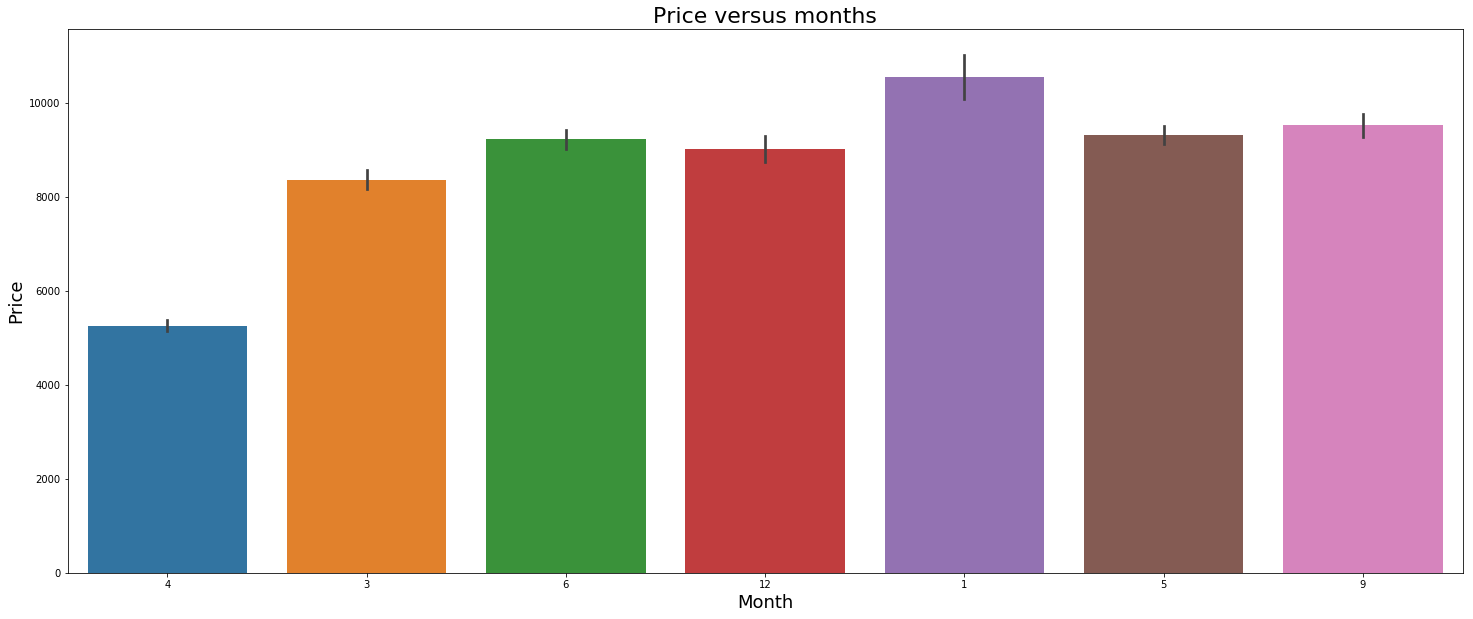

In [27]:
# Visualize
plt.figure(figsize=(25,10))
plt.title('Price versus months',fontsize=22)
df_stops = df_train_initial.groupby(["month"])['Price'].aggregate(np.median).reset_index().sort_values('Price')
sns.barplot(x="month", y="Price", data=df_train_initial, order=df_stops['month'])
plt.xlabel('Month', fontsize=18)
plt.ylabel('Price', fontsize=18)

#now we will derive the departure hour (approximate to the hour value ignoring the minutes)

In [28]:
df_train_initial['departure_hour'] = df_train_initial['Dep_Time'].str.split(':').str[0]

# Some visualizations with departure_hour

Text(0,0.5,'Price')

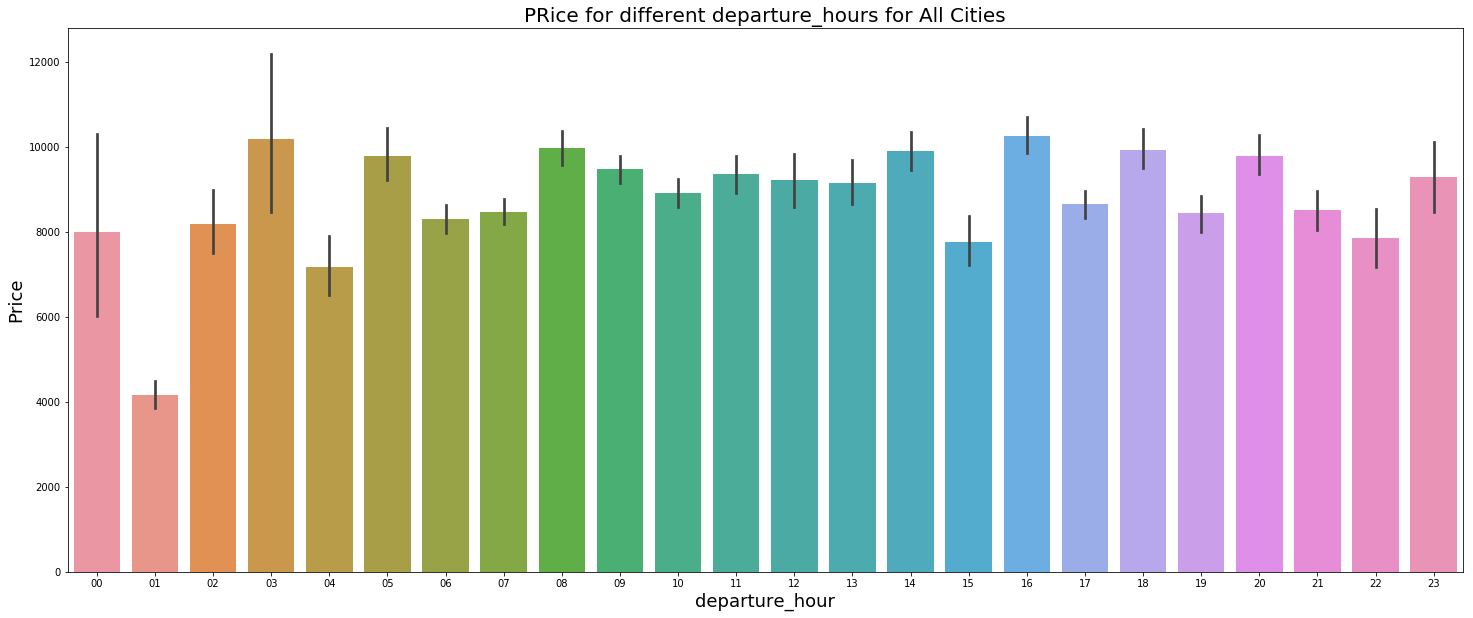

In [29]:
# ALL cities
plt.figure(figsize=(25,10))                                                         
plt.title('PRice for different departure_hours for All Cities', fontsize=20)
df_stops = df_train_initial.groupby(["departure_hour"])['Price'].aggregate(np.median).reset_index().sort_values('departure_hour')
sns.barplot(x='departure_hour', y="Price", data=df_train_initial, order=df_stops['departure_hour'])
plt.xlabel('departure_hour', fontsize=18)
plt.ylabel('Price', fontsize=18)


Text(0,0.5,'Price')

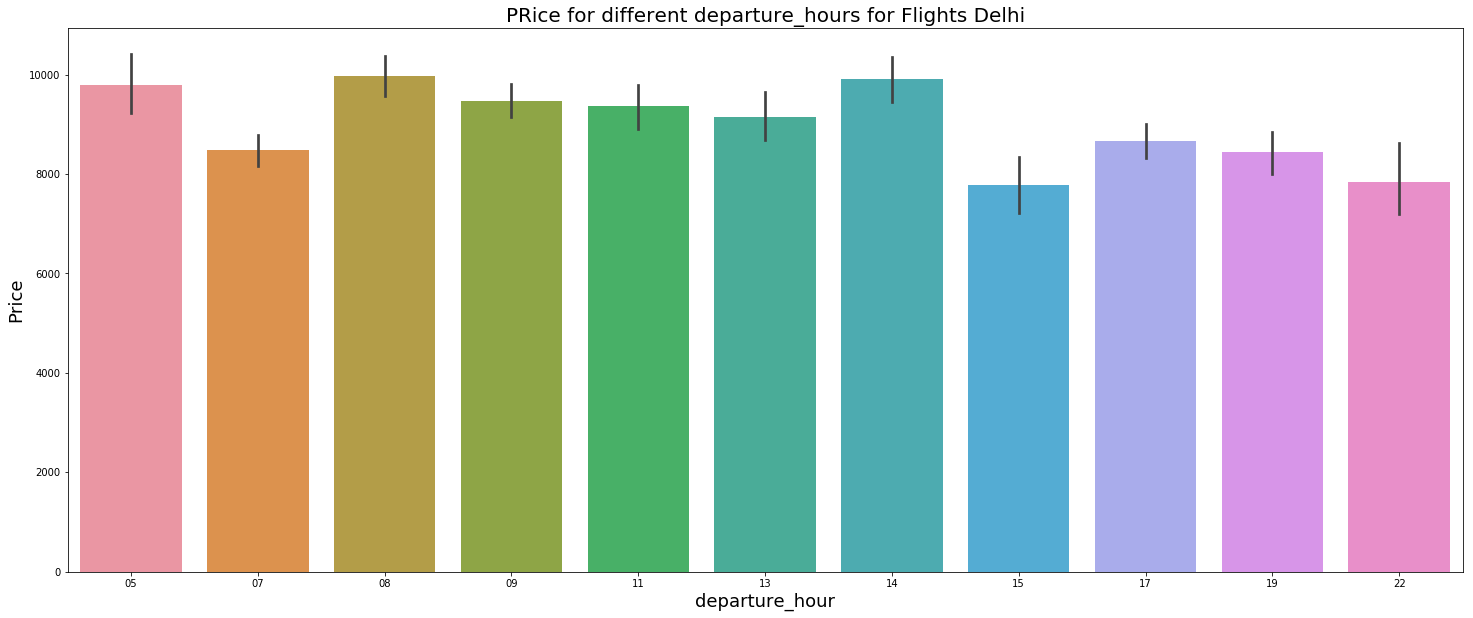

In [30]:
# Check the effect of flight start time for each city; it could be different for each city
# DELHI
df_train_initial_sourceDelhi=df_train_initial[df_train_initial.Source == 'Chennai']
#df_train_initial_sourceDelhi.head()
plt.figure(figsize=(25,10))
                                                          
plt.title('PRice for different departure_hours for Flights Delhi', fontsize=20)
df_stops = df_train_initial_sourceDelhi.groupby(["departure_hour"])['Price'].aggregate(np.median).reset_index().sort_values('departure_hour')
sns.barplot(x='departure_hour', y="Price", data=df_train_initial, order=df_stops['departure_hour'])
plt.xlabel('departure_hour', fontsize=18)
plt.ylabel('Price', fontsize=18)


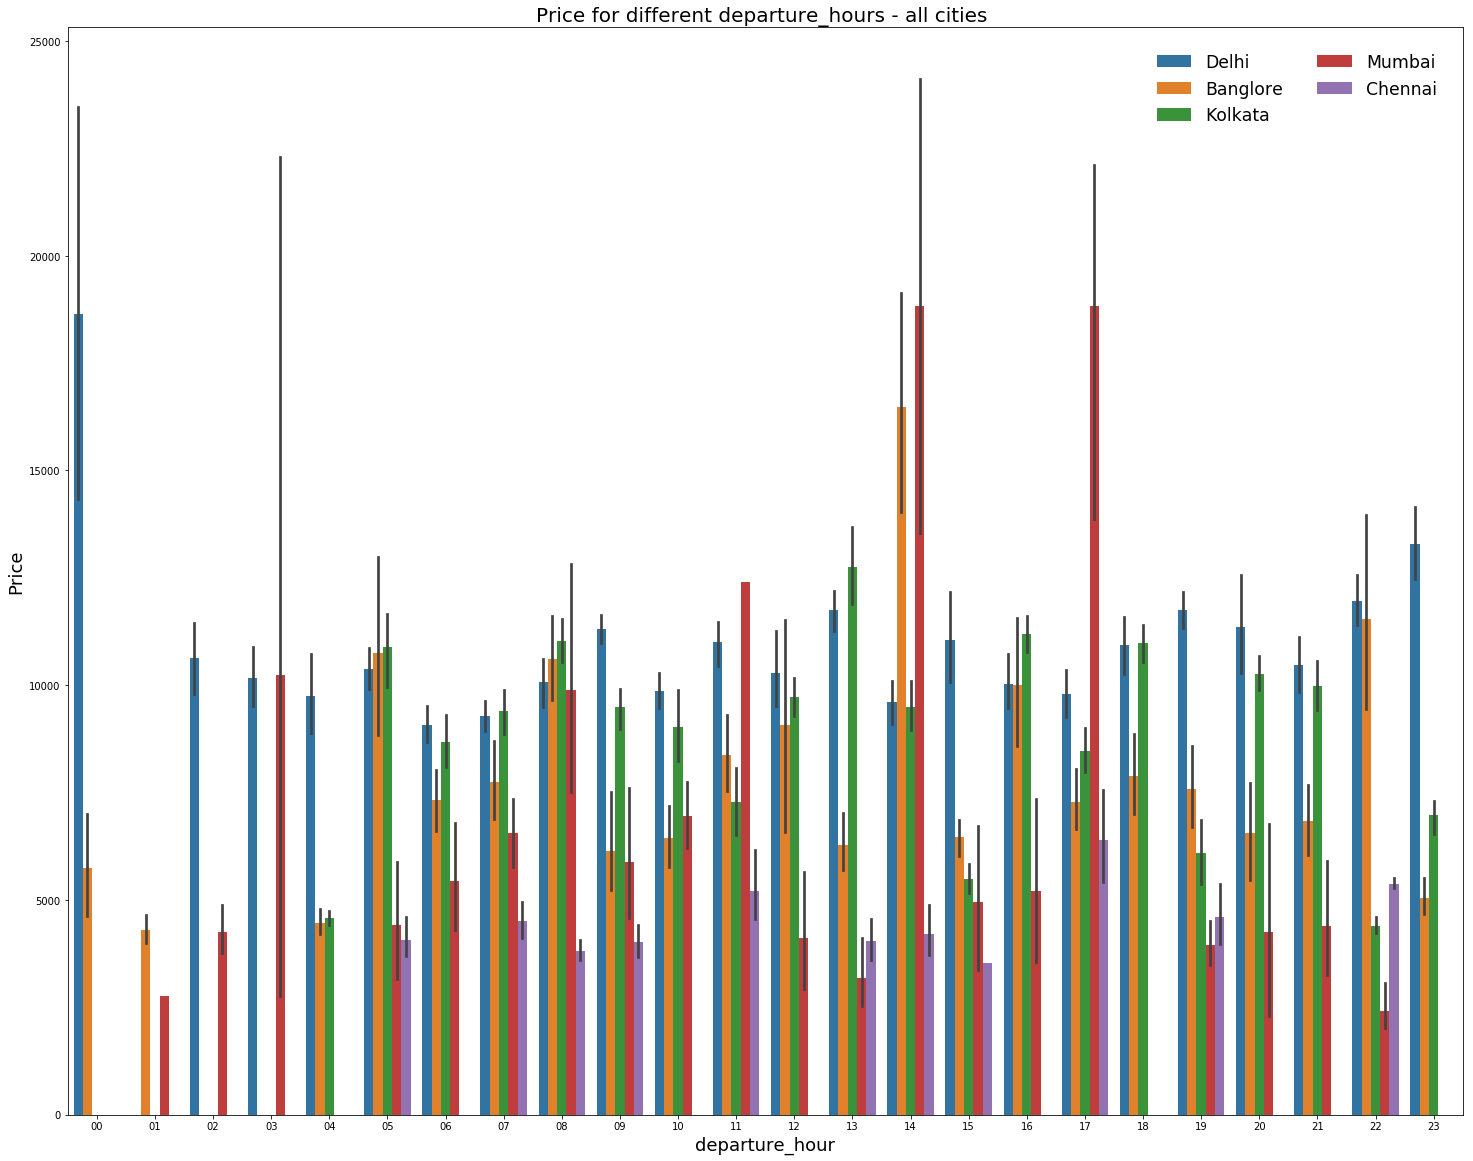

In [31]:
# Lets plat a combined plot for all cities
plt.figure(figsize=(25,20))
plt.title('Price for different departure_hours - all cities ',fontsize=20)
df_stops = df_train_initial.groupby(["departure_hour"])['Price'].aggregate(np.median).reset_index().sort_values('departure_hour')
sns.barplot(x='departure_hour', y="Price", data=df_train_initial, order=df_stops['departure_hour'], hue=df_train_initial['Source'])
plt.xlabel('departure_hour', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.legend(loc='upper right',frameon=False, ncol=2, fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize='xx-large')

# Observations
#We see that there is city wise variation in the departure_hour effect, suggesting demand periods dependng on 
#when people want to reach the destination
#Similar analysis could be done for arrival time, but as it could just be complementary in nature is ignored for now

In [32]:
# create new variable hours from duration column
df_train_initial['hours']=df_train_initial['Duration'].str.split(' ').str[0].str.rstrip('h')

Text(0,0.5,'Price')

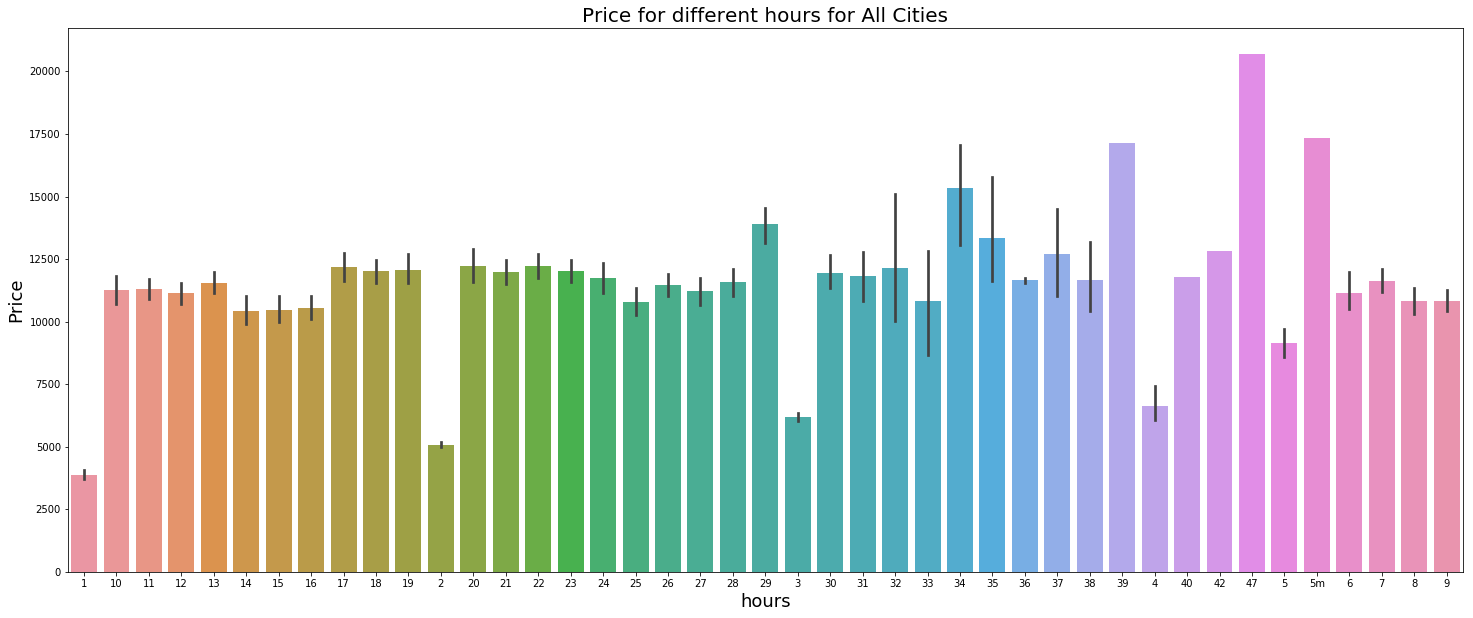

In [33]:
# ALL cities
plt.figure(figsize=(25,10))                                                         
plt.title('Price for different hours for All Cities', fontsize=20)
df_stops = df_train_initial.groupby(["hours"])['Price'].aggregate(np.median).reset_index().sort_values('hours')
sns.barplot(x='hours', y="Price", data=df_train_initial, order=df_stops['hours'])
plt.xlabel('hours', fontsize=18)
plt.ylabel('Price', fontsize=18)

# Observation 
#seems like no trend when all the flights are considered
#lets consider only one-stop flights where we can expect linear relation

Text(0,0.5,'Price')

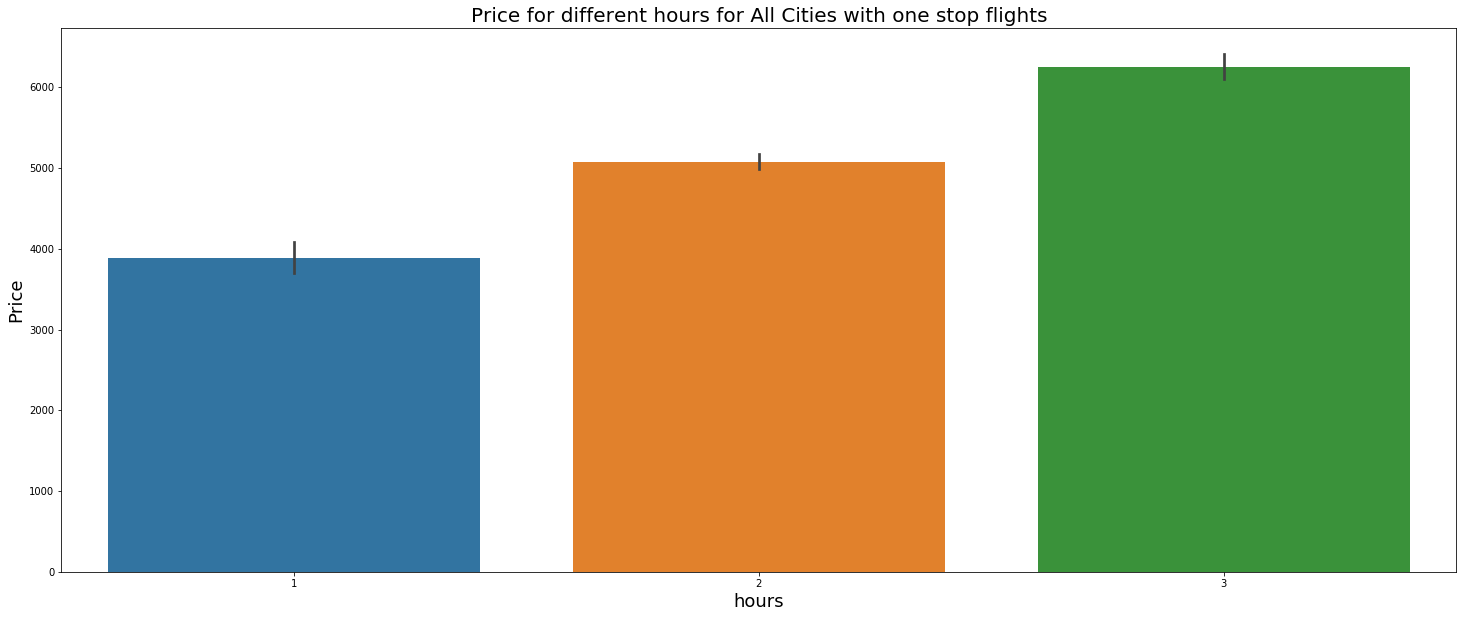

In [34]:
# ALL cities
df_train_initial_onestop=df_train_initial[df_train_initial.stops == 0]
plt.figure(figsize=(25,10))                                                         
plt.title('Price for different hours for All Cities with one stop flights', fontsize=20)
df_stops = df_train_initial_onestop.groupby(["hours"])['Price'].aggregate(np.median).reset_index().sort_values('hours')
sns.barplot(x='hours', y="Price", data=df_train_initial_onestop, order=df_stops['hours'])
plt.xlabel('hours', fontsize=18)
plt.ylabel('Price', fontsize=18)

In [35]:
# Observation
# we can see one-stop flights have a linear relation. Hence we will keep the parameter

In [36]:
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 16 columns):
Airline            8011 non-null object
Date_of_Journey    8011 non-null object
Source             8011 non-null object
Destination        8011 non-null object
Route              8011 non-null object
Dep_Time           8011 non-null object
Arrival_Time       8011 non-null object
Duration           8011 non-null object
Total_Stops        8011 non-null object
Additional_Info    8011 non-null object
Price              8011 non-null int64
stops              8011 non-null int32
day_of_week        8011 non-null object
month              8011 non-null object
departure_hour     8011 non-null object
hours              8011 non-null object
dtypes: int32(1), int64(1), object(14)
memory usage: 1.3+ MB


In [37]:
#drop the columns not required in analysis
# Route is removed as it can be indirectly derived from Total_stops, which is simplified to 'stops'
# Dep_time and Arrival_time are both removed whih is replaced by new column departure_hour
# Duration is removed as stops indicate increased duration for multi-hop flights automatically and further for flights other than 
#  non-stop flights the values can be misleading. If at all we have to use only for non-stop flights. For now ignored. 
df_train_initial.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops'],axis=1,inplace=True)

In [38]:
#check the final dataframe
df_train_initial.head()

,Airline,Source,Destination,Additional_Info,Price,stops,day_of_week,month,departure_hour,hours
0,Airline C,Delhi,Cochin,No info,7480,1,4,12,20,12
1,Airline A,Banglore,Delhi,No info,8016,0,1,6,18,3
2,Airline C,Delhi,Cochin,No info,8879,1,5,5,03,15
3,Airline A,Kolkata,Banglore,In-flight meal not included,9663,1,2,6,20,12
4,Airline A,Kolkata,Banglore,In-flight meal not included,9663,1,3,9,06,5


In [39]:
df_train_initial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8011 entries, 0 to 8011
Data columns (total 10 columns):
Airline            8011 non-null object
Source             8011 non-null object
Destination        8011 non-null object
Additional_Info    8011 non-null object
Price              8011 non-null int64
stops              8011 non-null int32
day_of_week        8011 non-null object
month              8011 non-null object
departure_hour     8011 non-null object
hours              8011 non-null object
dtypes: int32(1), int64(1), object(8)
memory usage: 977.2+ KB


# Do all the steps for Test data also

In [40]:
df_test_initial.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [41]:
# Inspect all other data for consistency
df_test_initial['Source'].value_counts()


Delhi       1139
Kolkata      719
Banglore     547
Mumbai       174
Chennai       92
Name: Source, dtype: int64

In [42]:
df_test_initial['Destination'].value_counts()

Cochin       1139
Banglore      719
Delhi         309
New Delhi     238
Hyderabad     174
Kolkata        92
Name: Destination, dtype: int64

In [43]:
# The above values suggest need to combine the values for Delhi and 'New Delhi'
df_train_initial['Destination'] = df_train_initial['Destination'].replace(['New Delhi'],'Delhi')
df_train_initial['Destination'].value_counts()

Cochin       3397
Banglore     2152
Delhi        1650
Hyderabad     523
Kolkata       289
Name: Destination, dtype: int64

In [44]:
df_test_initial['Total_Stops'].value_counts()


1 stop      1390
non-stop     861
2 stops      408
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [45]:
# Additional Feature Creation
# From Total_Stops we know non-stop would mean 0. so we will replace 'non' with 0, take out only the first char and convert the data type to int and 
# create this as a new variable

In [46]:
df_test_initial['stops'] = df_test_initial['Total_Stops'].replace('non-stop','0 stops').str.split(' ').str[0].astype(int)

In [47]:
# create new time features deried from Date_of_Journey 


In [48]:
#create day_of_week
df_test_initial['day_of_week']=pd.DatetimeIndex(df_test_initial['Date_of_Journey']).dayofweek.astype(object)

In [49]:
df_test_initial['departure_hour'] = df_test_initial['Dep_Time'].str.split(':').str[0]

In [50]:
df_test_initial['month']=pd.DatetimeIndex(df_test_initial['Date_of_Journey']).month.astype(object)

In [51]:
df_test_initial['hours']=df_test_initial['Duration'].str.split(' ').str[0].str.rstrip('h')

In [52]:
df_test_initial.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration','Total_Stops'],axis=1,inplace=True)

In [53]:
#check the final dataframe
df_test_initial.head()

,Airline,Source,Destination,Additional_Info,stops,day_of_week,departure_hour,month,hours
0,Airline B,Delhi,Cochin,No info,1,2,04,3,11
1,Airline E,Kolkata,Banglore,No info,0,0,22,5,2
2,Airline C,Kolkata,Banglore,No info,2,3,05,6,14
3,Airline A,Banglore,New Delhi,No info,1,0,09,6,4
4,Airline B,Delhi,Cochin,No info,1,5,16,6,9


#  End of test data pre-processing; we have train and test columns same except the target variable 'Price'


# As last step we remove outliers for price > 20000 as done previously

In [54]:
# drop rows with price greater than 20000
df_train_initial.drop(df_train_initial[df_train_initial['Price'] > 20000.0].index, inplace=True )
df_train_initial.shape


(7898, 10)

In [55]:
df_test_initial.shape

(2671, 9)

#  All set
# Lets make copies of train and test sets as of now 

In [56]:
df_train_normalized=df_train_initial.copy(deep=True)
df_test_normalized=df_test_initial.copy(deep=True)

In [57]:
#modelling
# we will try first with label encoding and then with one hot encoding [combining test and training sets]
# Airline,Source,Destination, Additional_Info, day_of_week, departure_hour to be encoded

In [58]:
# LABEL encoding

In [59]:
#Create the label encoded data
#Initializing lable encoder
le = LabelEncoder()

#Code that auto encodes any dataframe column of type category or object.        
columnsToEncode = list(df_train_initial.select_dtypes(include=['object']))
print(' '.join(columnsToEncode))
#Initializing Label Encoder
le = LabelEncoder()

#Iterating through each of the categorical columns and label encoding them
for feature in columnsToEncode:
    try:
        df_train_initial[feature] = le.fit_transform(df_train_initial[feature])
    except:
        print('Error encoding '+feature)

Airline Source Destination Additional_Info day_of_week month departure_hour hours


In [60]:
# check encoded columns
df_train_initial.head()

,Airline,Source,Destination,Additional_Info,Price,stops,day_of_week,month,departure_hour,hours
0,2,2,1,5,7480,1,4,6,20,3
1,0,0,2,5,8016,0,1,4,18,22
2,2,2,1,5,8879,1,5,3,3,6
3,0,3,0,2,9663,1,2,4,20,3
4,0,3,0,2,9663,1,3,5,6,36


In [61]:
df_train_initial.describe()

,Airline,Source,Destination,Additional_Info,Price,stops,day_of_week,month,departure_hour,hours
count,7898.000000,7898.000000,7898.000000,7898.000000,7898.000000,7898.000000,7898.000000,7898.000000,7898.000000,7898.000000
mean,1.722715,1.967080,1.167384,4.397569,8800.150038,0.813370,2.887440,3.061535,12.453153,16.389466
std,1.842636,1.169201,1.016934,1.177844,3959.478923,0.671882,1.831752,1.813730,5.730992,13.167664
min,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,5228.000000,0.000000,1.000000,1.000000,8.000000,6.000000
50%,1.000000,2.000000,1.000000,5.000000,8266.000000,1.000000,3.000000,3.000000,11.000000,11.000000
75%,3.000000,3.000000,2.000000,5.000000,12192.000000,1.000000,4.000000,4.000000,17.000000,22.000000
max,10.000000,4.000000,4.000000,6.000000,19907.000000,3.000000,6.000000,6.000000,23.000000,41.000000


In [62]:
# Do the same thing for test data as well

In [63]:
#Iterating through each of the categoerical columns and label encoding them
for feature in columnsToEncode:
    try:
        df_test_initial[feature] = le.fit_transform(df_test_initial[feature])
    except:
        print('Error encoding '+feature)

In [64]:
df_test_initial.head()

,Airline,Source,Destination,Additional_Info,stops,day_of_week,departure_hour,month,hours
0,1,2,1,5,1,2,4,1,2
1,4,3,0,5,0,0,22,3,11
2,2,3,0,5,2,3,5,4,5
3,0,0,5,5,1,0,9,4,32
4,1,2,1,5,1,5,16,4,40


In [65]:
df_test_initial.describe()

,Airline,Source,Destination,Additional_Info,stops,day_of_week,departure_hour,month,hours
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000
mean,1.691501,1.955447,1.436541,4.580681,0.83976,2.909023,12.606889,2.952827,15.916136
std,1.818939,1.175546,1.480332,0.837412,0.68516,1.861184,5.792906,1.826158,12.841051
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.00000,1.000000,8.000000,1.000000,6.000000
50%,1.000000,2.000000,1.000000,5.000000,1.00000,3.000000,12.000000,3.000000,11.000000
75%,3.000000,3.000000,2.000000,5.000000,1.00000,4.000000,18.000000,4.000000,22.000000
max,8.000000,4.000000,5.000000,5.000000,4.00000,6.000000,23.000000,6.000000,40.000000


In [66]:
df_test_initial.shape

(2671, 9)

In [67]:
# continue with modelling however - Option 1 [LABEL encoding trin ,test seperately] 
# break x,y 
X= df_train_initial.drop("Price",axis=1)
Y=df_train_initial["Price"]

In [68]:
#create linear regression model
lin_reg = LinearRegression()
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
lin_reg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
#predict Y
Y_predict=lin_reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [70]:
df_predicted.head(10)


,Actual,Predicted
0,5380,10355.0
1,12898,9612.0
2,19329,14399.0
3,16289,10699.0
4,4423,6176.0
5,3100,4593.0
6,4575,4830.0
7,12898,9705.0
8,13817,11207.0
9,12692,10894.0


In [71]:
df_predicted.describe()

,Actual,Predicted
count,2370.000000,2370.000000
mean,8838.302532,8840.868354
std,3936.997279,2824.645778
min,1965.000000,1044.000000
25%,5298.000000,6610.250000
50%,8372.000000,9375.000000
75%,12121.000000,10329.000000
max,19372.000000,17069.000000


In [72]:
#Find RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))


RMSE 2718.61


In [73]:
# MODEL 1 observations
# The predicted values are all higher
# RMSE is quite high
# Both could be because the higher values of outliers dragging all the values higher side
# improements could be also gained in the model by Labelling the train and test data together

# Now lets try to improve our model 
#Lets try one hot encoding - including both traing and test data 

In [74]:
df_train_normalized2=df_train_normalized # make another future copy
df_test_normalized2=df_test_normalized # make another future copy

In [75]:
df_test_normalized.head()

,Airline,Source,Destination,Additional_Info,stops,day_of_week,departure_hour,month,hours
0,Airline B,Delhi,Cochin,No info,1,2,04,3,11
1,Airline E,Kolkata,Banglore,No info,0,0,22,5,2
2,Airline C,Kolkata,Banglore,No info,2,3,05,6,14
3,Airline A,Banglore,New Delhi,No info,1,0,09,6,4
4,Airline B,Delhi,Cochin,No info,1,5,16,6,9


In [76]:
df_test_normalized.shape

(2671, 9)

In [77]:
# Do one-hot-encoding combining test and train data and splitting back
Y_train=df_train_normalized['Price']

In [78]:
df_train_normalized['train']=1
df_test_normalized['train']=0

In [79]:
common = pd.concat([df_train_normalized, df_test_normalized]) # axis =0 by default - rows added


In [80]:
common.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10569 entries, 0 to 2670
Data columns (total 11 columns):
Additional_Info    10569 non-null object
Airline            10569 non-null object
Destination        10569 non-null object
Price              7898 non-null float64
Source             10569 non-null object
day_of_week        10569 non-null object
departure_hour     10569 non-null object
hours              10569 non-null object
month              10569 non-null object
stops              10569 non-null int32
train              10569 non-null int64
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 949.6+ KB


In [81]:
#combined=pd.get_dummies()
common = pd.get_dummies(common, columns=['Additional_Info','Airline','Destination','Source','day_of_week','departure_hour','hours','month'], drop_first=True)

In [82]:
common.head()

,Price,stops,train,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Airline_Airline K,Airline_Airline L,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,departure_hour_01,departure_hour_02,departure_hour_03,departure_hour_04,departure_hour_05,departure_hour_06,departure_hour_07,departure_hour_08,departure_hour_09,departure_hour_10,departure_hour_11,departure_hour_12,departure_hour_13,departure_hour_14,departure_hour_15,departure_hour_16,departure_hour_17,departure_hour_18,departure_hour_19,departure_hour_20,departure_hour_21,departure_hour_22,departure_hour_23,hours_10,hours_11,hours_12,hours_13,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_2,hours_20,hours_21,hours_22,hours_23,hours_24,hours_25,hours_26,hours_27,hours_28,hours_29,hours_3,hours_30,hours_31,hours_32,hours_33,hours_34,hours_35,hours_36,hours_37,hours_38,hours_39,hours_4,hours_40,hours_41,hours_42,hours_47,hours_5,hours_5m,hours_6,hours_7,hours_8,hours_9,month_3,month_4,month_5,month_6,month_9,month_12
0,7480.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8016.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,8879.0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9663.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,9663.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [83]:
# break them back as train and test data 
df_train_onehot=common[common['train']==1]

In [84]:
df_train_onehot.shape


(7898, 107)

In [85]:
df_test_onehot=common[common['train']==0]

In [86]:
df_test_onehot.shape

(2671, 107)

In [87]:
# drop price from test
df_test_onehot.drop(['Price'],axis=1,inplace=True)

In [88]:
df_test_normalized.shape

(2671, 10)

In [89]:
# Extract X,Y again from new train dataset
X= df_train_onehot.drop("Price",axis=1)
Y=df_train_onehot['Price']

In [90]:
#create linear regression model
lin_reg = LinearRegression()
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
#predict Y
Y_predict=lin_reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [92]:
df_predicted.describe()

,Actual,Predicted
count,2370.000000,2.370000e+03
mean,8838.302532,-9.124786e+10
std,3936.997279,4.328919e+12
min,1965.000000,-2.104443e+14
25%,5298.000000,5.684000e+03
50%,8372.000000,9.544000e+03
75%,12121.000000,1.118950e+04
max,19372.000000,4.510217e+12


In [93]:
df_predicted.head(10)

,Actual,Predicted
0,5380.0,6987.0
1,12898.0,11300.0
2,19329.0,14890.0
3,16289.0,13783.0
4,4423.0,4328.0
5,3100.0,4182.0
6,4575.0,2644.0
7,12898.0,10542.0
8,13817.0,14107.0
9,12692.0,12649.0


In [94]:
#Find RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 4328967244735.43


In [95]:
#######################

# RMSE values are  high and predictions are not close
#one option is to use scalar
#but before that lets try cross-validation and see if it improves the score

# check with cross validation 


In [96]:
# Create 10 folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Create a model 

modelonecv = LinearRegression()


# Train and evaluate multiple models using kfolds
resultsone = cross_val_score(modelonecv, X, Y, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))


[-1.82041858e+25 -8.01775224e+28 -4.56772491e+06 -4.31201075e+06
 -3.83324058e+06 -3.99480759e+06 -4.38601561e+06 -5.38824075e+27
 -4.28565118e+06 -4.51862680e+16]
('Mean:', -8.55839672892737e+27)
('Std:', 2.3926986885829603e+28)
('RMSE', 92511603212393.69)


# The value of RMSE is slightly rediced to 99.91; a slight improvement
# we will check with 5 splits for cv


In [97]:
# Trial with 5  folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create a model 

modelonecv = LinearRegression()


# Train and evaluate multiple models using kfolds
resultsone = cross_val_score(modelonecv, X, Y, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone))))


[-5.09854186e+26 -6.16579541e+27 -8.78648769e+29 -6.45237637e+25
 -1.18821442e+15]
('Mean:', -1.770777883913649e+29)
('Std:', 3.5079316526886106e+29)
('RMSE', 420806117340711.8)


# The value of RMSE is not changed with reducing splits to 5 for CV


# Lets do some Ridge Analysis

In [98]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
#reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

In [99]:
#perform the test,train split within the training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)          
#fit the regressor
reg.fit(X_train, Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [100]:
#predict Y
Y_predict=reg.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [101]:
df_predicted.describe()

,Actual,Predicted
count,2370.000000,2370.000000
mean,8838.302532,8830.776793
std,3936.997279,3375.627207
min,1965.000000,926.000000
25%,5298.000000,5720.750000
50%,8372.000000,9524.000000
75%,12121.000000,11215.750000
max,19372.000000,16451.000000


In [102]:
df_predicted.head(10)

,Actual,Predicted
0,5380.0,6982.0
1,12898.0,11285.0
2,19329.0,15023.0
3,16289.0,13762.0
4,4423.0,4194.0
5,3100.0,4371.0
6,4575.0,2789.0
7,12898.0,10536.0
8,13817.0,14056.0
9,12692.0,12653.0


In [103]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 2031.06


In [104]:
# Try with alpha = 0.3

In [105]:
reg_pt3 = linear_model.Ridge(alpha=.3)


In [106]:
reg_pt3.fit(X_train, Y_train)


Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [107]:
#predict Y
Y_predict=reg_pt3.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [108]:
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 2030.19


In [109]:
# Try with alpha = 0.3

In [110]:
reg_pt7 = linear_model.Ridge(alpha=.7)


In [111]:
reg_pt7.fit(X_train, Y_train)

Ridge(alpha=0.7, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
#predict Y
Y_predict=reg_pt7.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [113]:
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 2032.32


# LETS stop Ridge here and continue with RandomForestRegressor

# Start of RandomForestRegressor

In [114]:
reg_rf1=RandomForestRegressor()

In [115]:
reg_rf1.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [116]:
#predict Y
Y_predict=reg_rf1.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [117]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1740.92


In [118]:
# Hyperparameter tuning for Random forest
reg_rf1=RandomForestRegressor()

In [119]:
#submission = pd.DataFrame(Y_predict,columns=['Price'])
#submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('../data/submission.csv',index=False)

In [120]:
# Create 10 folds
#https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6541851-resample-your-model-with-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

# Create a model 

modelonecv1 = RandomForestRegressor()


# Train and evaluate multiple models using kfolds
resultsone1 = cross_val_score(modelonecv1, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
#for train, test in .split(X, yc):
#    print("train: %s test: %s" % (train, test))

print(resultsone)
print("Mean:", resultsone.mean())
print("Std:", resultsone.std())
print("RMSE",sqrt(np.mean(np.abs(resultsone1))))

[-5.09854186e+26 -6.16579541e+27 -8.78648769e+29 -6.45237637e+25
 -1.18821442e+15]
('Mean:', -1.770777883913649e+29)
('Std:', 3.5079316526886106e+29)
('RMSE', 1747.0963933962428)


In [121]:
modelonecv1.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [122]:
#untest
#predict Y
Y_predict=modelonecv1.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [123]:
df_predicted.head(10)

,Actual,Predicted
0,5380.0,6036.0
1,12898.0,12634.0
2,19329.0,12974.0
3,16289.0,16142.0
4,4423.0,4027.0
5,3100.0,3284.0
6,4575.0,4678.0
7,12898.0,12581.0
8,13817.0,13817.0
9,12692.0,12470.0


In [124]:
df_predicted.describe()

,Actual,Predicted
count,2370.000000,2370.000000
mean,8838.302532,8830.609283
std,3936.997279,3676.506956
min,1965.000000,1924.000000
25%,5298.000000,5495.000000
50%,8372.000000,8698.500000
75%,12121.000000,11920.000000
max,19372.000000,19309.000000


In [125]:
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1742.32


In [127]:
Y_predict=modelonecv1.predict(df_test_onehot)

In [128]:
submission = pd.DataFrame(Y_predict,columns=['Price'])
#submission = pd.concat([Id,prediction['y']],1)

submission.to_csv('../data/submission.csv',index=False)

In [129]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [130]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [131]:
#predict Y
Y_predict=model.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [132]:
df_predicted.head(10)

,Actual,Predicted
0,5380.0,7032.0
1,12898.0,10887.0
2,19329.0,14073.0
3,16289.0,12670.0
4,4423.0,4778.0
5,3100.0,3918.0
6,4575.0,4039.0
7,12898.0,10887.0
8,13817.0,12670.0
9,12692.0,12221.0


In [133]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1975.06


In [137]:
df_train_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7898 entries, 0 to 8011
Columns: 107 entries, Price to month_12
dtypes: float64(1), int32(1), int64(1), uint8(104)
memory usage: 1018.1 KB


#Lets try GradientBoostingRegressor

In [145]:
from sklearn.ensemble import GradientBoostingRegressor 
gbrt=GradientBoostingRegressor(n_estimators=100)

In [146]:
gbrt.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [162]:
#predict Y
Y_predict=gbrt.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [163]:
df_predicted.head(10)

,Actual,Predicted
0,5380.0,6270.0
1,12898.0,12251.0
2,19329.0,14733.0
3,16289.0,15136.0
4,4423.0,4778.0
5,3100.0,3350.0
6,4575.0,3790.0
7,12898.0,11800.0
8,13817.0,14209.0
9,12692.0,12617.0


In [164]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1691.03


In [151]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
lbrt=LGBMRegressor()


In [155]:
gbrt.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [159]:
#predict Y
Y_predict=gbrt.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

In [160]:
df_predicted.head(10)

,Actual,Predicted
0,5380.0,6270.0
1,12898.0,12251.0
2,19329.0,14733.0
3,16289.0,15136.0
4,4423.0,4778.0
5,3100.0,3350.0
6,4575.0,3790.0
7,12898.0,11800.0
8,13817.0,14209.0
9,12692.0,12617.0


In [161]:
from math import sqrt
#Find RMSE
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1691.03


In [166]:
from catboost import CatBoostRegressor

In [167]:
cbt=CatBoostRegressor()
cbt.fit(X_train, Y_train)
#predict Y
Y_predict=cbt.predict(X_test)
df_predicted=pd.DataFrame(
                            {'Actual':  np.round(Y_test,0),
                            'Predicted':np.round(Y_predict,0) }
                            ).reset_index(drop=True)

0:	learn: 9381.4499017	total: 155ms	remaining: 2m 34s
1:	learn: 9124.9192092	total: 248ms	remaining: 2m 3s
2:	learn: 8882.9082128	total: 321ms	remaining: 1m 46s
3:	learn: 8645.1852863	total: 365ms	remaining: 1m 30s
4:	learn: 8419.1204894	total: 428ms	remaining: 1m 25s
5:	learn: 8193.3468277	total: 501ms	remaining: 1m 23s
6:	learn: 7978.5790609	total: 560ms	remaining: 1m 19s
7:	learn: 7770.8346495	total: 625ms	remaining: 1m 17s
8:	learn: 7569.8031573	total: 681ms	remaining: 1m 15s
9:	learn: 7372.1250321	total: 744ms	remaining: 1m 13s
10:	learn: 7183.4242088	total: 807ms	remaining: 1m 12s
11:	learn: 7002.5341041	total: 867ms	remaining: 1m 11s
12:	learn: 6821.9086631	total: 943ms	remaining: 1m 11s
13:	learn: 6649.5313741	total: 1.05s	remaining: 1m 14s
14:	learn: 6486.9181618	total: 1.16s	remaining: 1m 16s
15:	learn: 6329.5323061	total: 1.27s	remaining: 1m 18s
16:	learn: 6176.1709015	total: 1.36s	remaining: 1m 18s
17:	learn: 6029.5464580	total: 1.46s	remaining: 1m 19s
18:	learn: 5888.02127

152:	learn: 2132.0607192	total: 10.2s	remaining: 56.2s
153:	learn: 2128.4342834	total: 10.2s	remaining: 56.2s
154:	learn: 2124.9941422	total: 10.3s	remaining: 56s
155:	learn: 2123.1457056	total: 10.3s	remaining: 55.9s
156:	learn: 2120.9099642	total: 10.4s	remaining: 55.8s
157:	learn: 2118.1290300	total: 10.4s	remaining: 55.7s
158:	learn: 2115.9550010	total: 10.5s	remaining: 55.5s
159:	learn: 2112.3955869	total: 10.6s	remaining: 55.4s
160:	learn: 2109.7603011	total: 10.6s	remaining: 55.3s
161:	learn: 2104.2430789	total: 10.7s	remaining: 55.2s
162:	learn: 2099.9509300	total: 10.7s	remaining: 55s
163:	learn: 2097.4733997	total: 10.8s	remaining: 54.9s
164:	learn: 2096.0938198	total: 10.8s	remaining: 54.8s
165:	learn: 2092.9834211	total: 10.9s	remaining: 54.7s
166:	learn: 2090.2208720	total: 10.9s	remaining: 54.5s
167:	learn: 2087.9397366	total: 11s	remaining: 54.4s
168:	learn: 2084.4604626	total: 11s	remaining: 54.3s
169:	learn: 2083.1922244	total: 11.1s	remaining: 54.2s
170:	learn: 2080.0

305:	learn: 1869.5817853	total: 19.3s	remaining: 43.8s
306:	learn: 1868.6633690	total: 19.4s	remaining: 43.8s
307:	learn: 1867.2529331	total: 19.4s	remaining: 43.7s
308:	learn: 1865.2253696	total: 19.5s	remaining: 43.6s
309:	learn: 1863.6777680	total: 19.5s	remaining: 43.5s
310:	learn: 1861.8046774	total: 19.6s	remaining: 43.4s
311:	learn: 1860.2703663	total: 19.7s	remaining: 43.3s
312:	learn: 1859.3745980	total: 19.7s	remaining: 43.3s
313:	learn: 1858.3755426	total: 19.8s	remaining: 43.2s
314:	learn: 1856.7216738	total: 19.8s	remaining: 43.1s
315:	learn: 1855.9164054	total: 19.9s	remaining: 43s
316:	learn: 1855.0952971	total: 19.9s	remaining: 42.9s
317:	learn: 1854.3060009	total: 20s	remaining: 42.9s
318:	learn: 1853.4678979	total: 20.1s	remaining: 42.8s
319:	learn: 1852.1753079	total: 20.1s	remaining: 42.7s
320:	learn: 1850.4874987	total: 20.2s	remaining: 42.6s
321:	learn: 1849.7982175	total: 20.2s	remaining: 42.6s
322:	learn: 1849.2172769	total: 20.3s	remaining: 42.5s
323:	learn: 18

455:	learn: 1731.0400553	total: 29.2s	remaining: 34.9s
456:	learn: 1730.1103394	total: 29.3s	remaining: 34.8s
457:	learn: 1728.3748199	total: 29.4s	remaining: 34.8s
458:	learn: 1727.9956442	total: 29.4s	remaining: 34.7s
459:	learn: 1727.7459977	total: 29.5s	remaining: 34.6s
460:	learn: 1726.9731063	total: 29.5s	remaining: 34.5s
461:	learn: 1726.6144138	total: 29.6s	remaining: 34.5s
462:	learn: 1726.2140549	total: 29.7s	remaining: 34.4s
463:	learn: 1725.7871527	total: 29.7s	remaining: 34.3s
464:	learn: 1725.3823592	total: 29.8s	remaining: 34.3s
465:	learn: 1724.6350763	total: 29.8s	remaining: 34.2s
466:	learn: 1724.3632903	total: 29.9s	remaining: 34.1s
467:	learn: 1723.5799998	total: 30s	remaining: 34.1s
468:	learn: 1723.2116722	total: 30.1s	remaining: 34.1s
469:	learn: 1722.8330386	total: 30.2s	remaining: 34s
470:	learn: 1722.4799887	total: 30.2s	remaining: 33.9s
471:	learn: 1721.5014734	total: 30.3s	remaining: 33.9s
472:	learn: 1721.2284858	total: 30.4s	remaining: 33.8s
473:	learn: 17

606:	learn: 1662.2686283	total: 38.6s	remaining: 25s
607:	learn: 1661.8637523	total: 38.6s	remaining: 24.9s
608:	learn: 1661.7739315	total: 38.7s	remaining: 24.8s
609:	learn: 1661.4442276	total: 38.7s	remaining: 24.8s
610:	learn: 1660.7090542	total: 38.8s	remaining: 24.7s
611:	learn: 1660.3065650	total: 38.9s	remaining: 24.6s
612:	learn: 1660.1001861	total: 38.9s	remaining: 24.6s
613:	learn: 1659.9205157	total: 39s	remaining: 24.5s
614:	learn: 1659.5363524	total: 39s	remaining: 24.4s
615:	learn: 1659.4397947	total: 39.1s	remaining: 24.4s
616:	learn: 1659.1727959	total: 39.1s	remaining: 24.3s
617:	learn: 1658.4804963	total: 39.2s	remaining: 24.2s
618:	learn: 1658.2438323	total: 39.3s	remaining: 24.2s
619:	learn: 1657.9353036	total: 39.3s	remaining: 24.1s
620:	learn: 1657.7329391	total: 39.4s	remaining: 24s
621:	learn: 1657.0363389	total: 39.4s	remaining: 23.9s
622:	learn: 1656.8254562	total: 39.5s	remaining: 23.9s
623:	learn: 1656.5798124	total: 39.5s	remaining: 23.8s
624:	learn: 1656.5

758:	learn: 1611.2420988	total: 47.9s	remaining: 15.2s
759:	learn: 1610.9915704	total: 48s	remaining: 15.1s
760:	learn: 1610.8839080	total: 48s	remaining: 15.1s
761:	learn: 1610.7303132	total: 48.1s	remaining: 15s
762:	learn: 1610.6420382	total: 48.2s	remaining: 15s
763:	learn: 1610.4616615	total: 48.2s	remaining: 14.9s
764:	learn: 1610.3689817	total: 48.3s	remaining: 14.8s
765:	learn: 1610.1284927	total: 48.4s	remaining: 14.8s
766:	learn: 1609.9964994	total: 48.4s	remaining: 14.7s
767:	learn: 1609.8746168	total: 48.5s	remaining: 14.6s
768:	learn: 1609.2660425	total: 48.5s	remaining: 14.6s
769:	learn: 1609.1724560	total: 48.6s	remaining: 14.5s
770:	learn: 1609.0342680	total: 48.7s	remaining: 14.5s
771:	learn: 1608.4310517	total: 48.7s	remaining: 14.4s
772:	learn: 1608.3450237	total: 48.8s	remaining: 14.3s
773:	learn: 1608.2665245	total: 48.9s	remaining: 14.3s
774:	learn: 1608.2109478	total: 48.9s	remaining: 14.2s
775:	learn: 1608.1631774	total: 49s	remaining: 14.1s
776:	learn: 1608.034

909:	learn: 1574.2850791	total: 57.2s	remaining: 5.66s
910:	learn: 1574.0023043	total: 57.3s	remaining: 5.6s
911:	learn: 1573.8619355	total: 57.3s	remaining: 5.53s
912:	learn: 1573.3463042	total: 57.4s	remaining: 5.47s
913:	learn: 1573.2514587	total: 57.4s	remaining: 5.41s
914:	learn: 1572.8305719	total: 57.5s	remaining: 5.34s
915:	learn: 1572.7511008	total: 57.6s	remaining: 5.28s
916:	learn: 1572.7102327	total: 57.6s	remaining: 5.21s
917:	learn: 1572.4492997	total: 57.7s	remaining: 5.15s
918:	learn: 1572.4184183	total: 57.7s	remaining: 5.09s
919:	learn: 1572.3507605	total: 57.8s	remaining: 5.02s
920:	learn: 1571.7859037	total: 57.8s	remaining: 4.96s
921:	learn: 1571.5962563	total: 57.9s	remaining: 4.9s
922:	learn: 1571.2357683	total: 57.9s	remaining: 4.83s
923:	learn: 1571.0501966	total: 58s	remaining: 4.77s
924:	learn: 1569.8433390	total: 58.1s	remaining: 4.71s
925:	learn: 1569.8296918	total: 58.1s	remaining: 4.64s
926:	learn: 1569.2171018	total: 58.2s	remaining: 4.58s
927:	learn: 15

In [168]:
df_predicted.head(10)

,Actual,Predicted
0,5380.0,6328.0
1,12898.0,12385.0
2,19329.0,14319.0
3,16289.0,14781.0
4,4423.0,4832.0
5,3100.0,2786.0
6,4575.0,3934.0
7,12898.0,11876.0
8,13817.0,14817.0
9,12692.0,12654.0


In [169]:
print('RMSE %.2f'%sqrt(mean_squared_error(Y_test,Y_predict)))

RMSE 1639.51


In [170]:
submission = pd.DataFrame(Y_predict,columns=['Price'])
submission.to_csv('../data/submission.csv',index=False)

## RESULTS: 
#RandomForestRegressor has privided the best RMSE values for this problem